In [1]:
%load_ext kedro.extras.extensions.ipython

The kedro.extras.extensions.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.extras.extensions.ipython


In [2]:
%reload_kedro

2022-07-21 12:15:49,575 - kedro.framework.hooks.manager - INFO - Registered hooks from 1 installed plugin(s): kedro-mlflow-0.8.1
2022-07-21 12:15:49,617 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-07-21 12:15:50,596 - root - INFO - ** Kedro project GetInData ML Framework
2022-07-21 12:15:50,596 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-07-21 12:15:50,605 - root - INFO - Registered line magic `run_viz`
2022-07-21 12:15:50,606 - root - INFO - Registered line magic `reload_kedro_mlflow`


In [3]:
import pandas as pd
import numpy as np

In [4]:
catalog.list()

['articles',
 'customers',
 'transactions',
 'customers_sample',
 'transactions_sample',
 'image_embeddings',
 'parameters',
 'params:image_embeddings_inference',
 'params:image_embeddings_inference.RUN_ID',
 'params:image_embeddings_inference.image_path',
 'params:image_embeddings_inference.batch_size',
 'params:image_embeddings',
 'params:image_embeddings.image_path',
 'params:image_embeddings.encoder',
 'params:image_embeddings.decoder',
 'params:image_embeddings.batch_size',
 'params:image_embeddings.image_size',
 'params:image_embeddings.embedding_size',
 'params:image_embeddings.num_epochs',
 'params:image_embeddings.shuffle_val',
 'params:image_embeddings.save_model',
 'params:image_embeddings.model_name',
 'params:cutoff_date',
 'params:sample_size']

In [5]:
articles = context.catalog.load('articles')

2022-07-21 12:16:34,079 - kedro.io.data_catalog - INFO - Loading data from `articles` (CSVDataSet)...


In [22]:
article_descriptions = articles['detail_desc'].astype('str').to_list()

In [23]:
len(article_descriptions)

105542

In [12]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

2022-07-21 12:21:06,351 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

2022-07-21 12:21:30,895 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device: cpu


In [25]:
embeddings = model.encode(article_descriptions)

Batches:   0%|          | 0/3299 [00:00<?, ?it/s]

In [27]:
embeddings[:5].shape

(5, 384)

In [41]:
text_embeddings = pd.DataFrame(data=embeddings, index=articles.article_id)

In [42]:
text_embeddings.columns = [f'emb_{i+1}' for i, _ in enumerate(text_embeddings.columns)]

In [43]:
text_embeddings

,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,...,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383,emb_384
article_id,,,,,,,,,,,,,,,,,,,,,
0108775015,-0.021778,0.114841,-0.015043,-0.036170,0.036829,0.020411,0.105487,0.101540,-0.010441,0.044803,...,-0.044506,0.001995,-0.018204,0.007749,-0.030176,0.068238,-0.007842,-0.019695,-0.031095,0.072681
0108775044,-0.021778,0.114841,-0.015043,-0.036170,0.036829,0.020411,0.105487,0.101540,-0.010441,0.044803,...,-0.044506,0.001995,-0.018204,0.007749,-0.030176,0.068238,-0.007842,-0.019695,-0.031095,0.072681
0108775051,-0.021778,0.114841,-0.015043,-0.036170,0.036829,0.020411,0.105487,0.101540,-0.010441,0.044803,...,-0.044506,0.001995,-0.018204,0.007749,-0.030176,0.068238,-0.007842,-0.019695,-0.031095,0.072681
0110065001,0.025916,0.069850,0.016605,0.017239,0.025374,0.017654,0.066278,0.019049,-0.025895,0.031579,...,-0.091709,0.018239,0.006757,-0.029541,0.018880,0.064395,-0.024554,-0.098762,0.017682,0.008351
0110065002,0.025916,0.069850,0.016605,0.017239,0.025374,0.017654,0.066278,0.019049,-0.025895,0.031579,...,-0.091709,0.018239,0.006757,-0.029541,0.018880,0.064395,-0.024554,-0.098762,0.017682,0.008351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0953450001,-0.108540,-0.058946,-0.018784,-0.035062,-0.001293,0.028299,0.035614,0.019618,-0.032890,0.142620,...,-0.049693,-0.075660,-0.020794,0.009820,-0.015252,0.042012,-0.009339,0.005948,0.009098,-0.043058
0953763001,0.049326,0.101343,0.044518,0.029941,0.035408,0.039383,0.029429,0.015354,-0.009107,0.058474,...,-0.050214,0.109503,-0.050790,-0.042581,0.009362,-0.021117,-0.051041,-0.050877,0.046876,0.050107
0956217002,-0.088943,0.099278,0.016247,0.008165,-0.026348,0.015119,-0.003456,-0.017410,-0.042182,0.037080,...,-0.080781,0.003123,0.025477,0.032957,-0.010439,0.056461,-0.023344,-0.010240,-0.010151,-0.009510


In [44]:
text_embeddings.to_parquet('../data/04_feature/text_embeddings.pq')

In [52]:
pd.read_parquet('../data/04_feature/text_embeddings.pq')

,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,...,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383,emb_384
article_id,,,,,,,,,,,,,,,,,,,,,
0108775015,-0.021778,0.114841,-0.015043,-0.036170,0.036829,0.020411,0.105487,0.101540,-0.010441,0.044803,...,-0.044506,0.001995,-0.018204,0.007749,-0.030176,0.068238,-0.007842,-0.019695,-0.031095,0.072681
0108775044,-0.021778,0.114841,-0.015043,-0.036170,0.036829,0.020411,0.105487,0.101540,-0.010441,0.044803,...,-0.044506,0.001995,-0.018204,0.007749,-0.030176,0.068238,-0.007842,-0.019695,-0.031095,0.072681
0108775051,-0.021778,0.114841,-0.015043,-0.036170,0.036829,0.020411,0.105487,0.101540,-0.010441,0.044803,...,-0.044506,0.001995,-0.018204,0.007749,-0.030176,0.068238,-0.007842,-0.019695,-0.031095,0.072681
0110065001,0.025916,0.069850,0.016605,0.017239,0.025374,0.017654,0.066278,0.019049,-0.025895,0.031579,...,-0.091709,0.018239,0.006757,-0.029541,0.018880,0.064395,-0.024554,-0.098762,0.017682,0.008351
0110065002,0.025916,0.069850,0.016605,0.017239,0.025374,0.017654,0.066278,0.019049,-0.025895,0.031579,...,-0.091709,0.018239,0.006757,-0.029541,0.018880,0.064395,-0.024554,-0.098762,0.017682,0.008351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0953450001,-0.108540,-0.058946,-0.018784,-0.035062,-0.001293,0.028299,0.035614,0.019618,-0.032890,0.142620,...,-0.049693,-0.075660,-0.020794,0.009820,-0.015252,0.042012,-0.009339,0.005948,0.009098,-0.043058
0953763001,0.049326,0.101343,0.044518,0.029941,0.035408,0.039383,0.029429,0.015354,-0.009107,0.058474,...,-0.050214,0.109503,-0.050790,-0.042581,0.009362,-0.021117,-0.051041,-0.050877,0.046876,0.050107
0956217002,-0.088943,0.099278,0.016247,0.008165,-0.026348,0.015119,-0.003456,-0.017410,-0.042182,0.037080,...,-0.080781,0.003123,0.025477,0.032957,-0.010439,0.056461,-0.023344,-0.010240,-0.010151,-0.009510


In [51]:
pd.read_parquet('../data/04_feature/image_embeddings.pq')

,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,...,emb_23,emb_24,emb_25,emb_26,emb_27,emb_28,emb_29,emb_30,emb_31,emb_32
0520567001,1.113570,1.652965,-2.150664,2.089924,1.185918,2.260038,0.347188,2.013080,-4.734544,2.401829,...,2.000686,-0.203081,-2.842822,0.491076,-0.041898,2.544570,0.108711,1.582202,4.200385,-2.020447
0878510001,1.440896,1.386671,-2.282617,2.140737,0.861950,2.160086,0.081075,1.767792,-4.800898,1.992157,...,1.690953,-0.155355,-3.091208,0.587815,-0.451221,2.764887,0.472128,1.551016,4.164678,-2.076929
0573864007,-0.756773,1.515813,-0.575650,0.610912,1.729891,1.219589,1.066304,1.665391,-1.978382,2.578543,...,1.910696,-0.529836,-0.362874,-0.167186,1.493992,0.243355,-1.165456,1.051262,2.017650,-0.793614
0832893002,1.166671,1.358555,-2.204620,1.964761,1.020163,2.024498,0.176020,1.753473,-4.681295,2.140842,...,1.751043,-0.385466,-2.843528,0.478610,-0.180656,2.487392,0.343982,1.669561,4.088965,-2.068283
0654410024,0.954770,1.656038,-1.991702,1.965235,1.226131,2.180871,0.416728,1.989732,-4.460274,2.408420,...,1.992496,-0.192630,-2.616585,0.438648,0.085421,2.344975,-0.017950,1.501997,3.983208,-1.887907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0633529002,1.327523,1.419485,-2.195643,2.077033,0.920927,2.135106,0.145037,1.786679,-4.670393,2.046457,...,1.725392,-0.160069,-2.958032,0.551450,-0.341934,2.646330,0.370856,1.521311,4.072208,-2.011706
0822895002,0.465804,1.816446,-1.594110,1.694565,1.478174,2.086462,0.703057,2.081953,-3.864438,2.640220,...,2.145513,-0.175431,-2.029728,0.285484,0.555910,1.832350,-0.474977,1.341418,3.559664,-1.581277
0759602003,0.219211,1.449860,-1.859456,1.441603,1.624016,1.712479,0.602240,1.854158,-4.219372,2.756952,...,2.081357,-0.978436,-1.977928,0.126406,0.792343,1.577121,-0.248939,1.944524,3.823016,-1.952026
0808866004,1.321241,1.388883,-2.257353,2.074804,0.943261,2.115245,0.129432,1.777275,-4.772482,2.077286,...,1.734248,-0.257146,-2.993631,0.540961,-0.325650,2.653567,0.409768,1.610972,4.155088,-2.082841


### visualize embeddings

In [53]:
from sklearn.neighbors import KDTree
from PIL import Image
import matplotlib.pyplot as plt
import os

In [55]:
tree = KDTree(text_embeddings.values, leaf_size=5)

In [56]:
def find_similar_images(query_article_id, embeddings, tree):
    _, ind = tree.query(embeddings.loc[query_article_id].values.reshape(1, -1), k=5)
    closest_embeddings = embeddings.iloc[ind[0]].index.tolist()
    imgs = [Image.open(f'../data/01_raw/images_128_128/{article_id}.jpg').convert('RGB') for article_id in closest_embeddings]
    _, axs = plt.subplots(1, 5, figsize=(12, 12))
    axs = axs.flatten()
    for img, article_id, ax in zip(imgs, closest_embeddings, axs):
        ax.title.set_text(f'{article_id}')
        ax.imshow(img)
    plt.show()

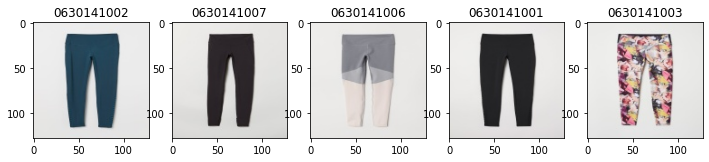

In [58]:
find_similar_images('0680263001', text_embeddings, tree)

In [61]:
def plot_n_random_similar_images(n, articles, embeddings):
    for i in range(n):
        random_article = articles.sample(1)
        print(f'''{i+1} random article:
        {random_article.prod_name},
        {random_article.article_id},
        {random_article.product_group_name}
        ''')
        find_similar_images(random_article.article_id, embeddings, tree)
        print('\n\n\n')

1 random article:
        87997    RACHEL swimsuit
Name: prod_name, dtype: object,
        87997    0831042002
Name: article_id, dtype: object,
        87997    Swimwear
Name: product_group_name, dtype: object
        


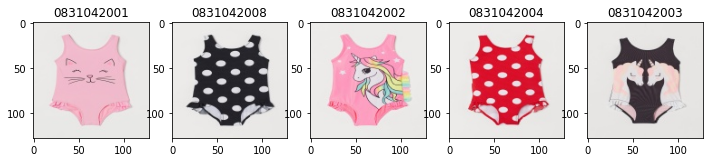





2 random article:
        81214    Aksel Skinny Legpocket
Name: prod_name, dtype: object,
        81214    0804955001
Name: article_id, dtype: object,
        81214    Garment Lower body
Name: product_group_name, dtype: object
        


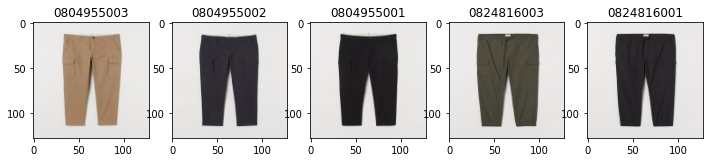





3 random article:
        29001    Figeholm boho blouse
Name: prod_name, dtype: object,
        29001    0624494001
Name: article_id, dtype: object,
        29001    Garment Upper body
Name: product_group_name, dtype: object
        


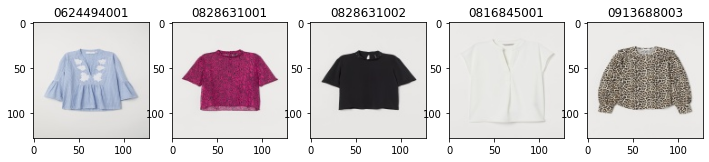





4 random article:
        31302    Svea Dress
Name: prod_name, dtype: object,
        31302    0631750002
Name: article_id, dtype: object,
        31302    Garment Full body
Name: product_group_name, dtype: object
        


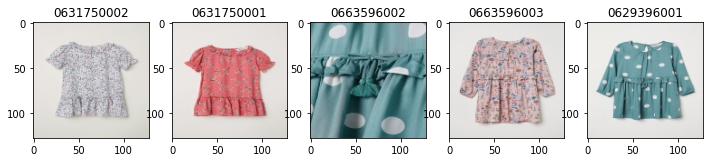





5 random article:
        88280    Tie Hard Triangle Top
Name: prod_name, dtype: object,
        88280    0832320001
Name: article_id, dtype: object,
        88280    Swimwear
Name: product_group_name, dtype: object
        


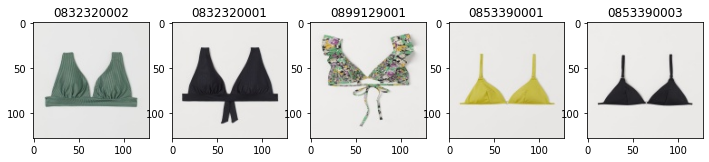

In [62]:
plot_n_random_similar_images(5, articles, text_embeddings)

Garment Upper body
Random article id: 14660    0564048016
Name: article_id, dtype: object, random_article name: 14660    BASIC HOOD
Name: prod_name, dtype: object


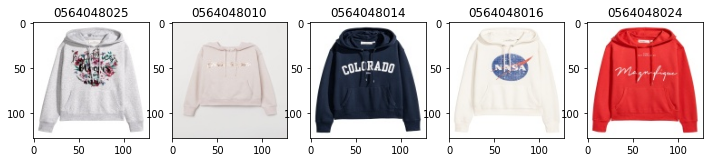





Underwear
Random article id: 78007    0792023002
Name: article_id, dtype: object, random_article name: 78007    Ellen Bikini 3pk
Name: prod_name, dtype: object


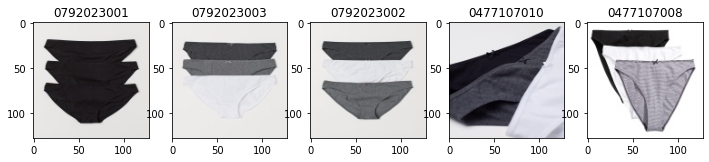





Socks & Tights
Random article id: 43077    0675214004
Name: article_id, dtype: object, random_article name: 43077    Fancy tights 2p OL
Name: prod_name, dtype: object


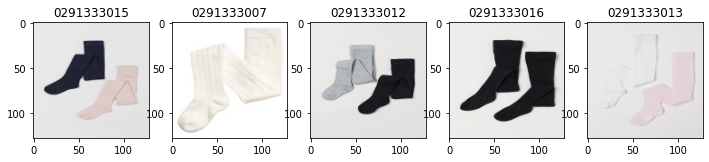





Garment Lower body
Random article id: 37076    0652591001
Name: article_id, dtype: object, random_article name: 37076    Bootcut Crew
Name: prod_name, dtype: object


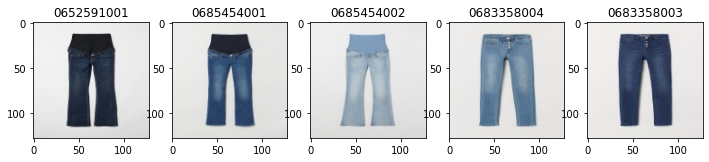





Accessories
Random article id: 58119    0718986001
Name: article_id, dtype: object, random_article name: 58119    Cool Windy earring
Name: prod_name, dtype: object


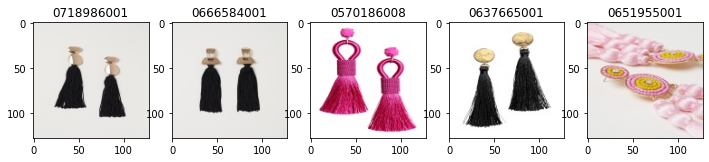





Items
Random article id: 92857    0855507004
Name: article_id, dtype: object, random_article name: 92857    Classic Penny SS Phone case
Name: prod_name, dtype: object


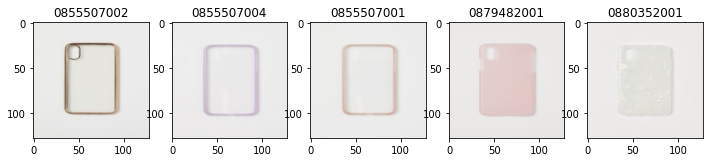





Nightwear
Random article id: 16805    0571503004
Name: article_id, dtype: object, random_article name: 16805    MARIO TROUSERS
Name: prod_name, dtype: object


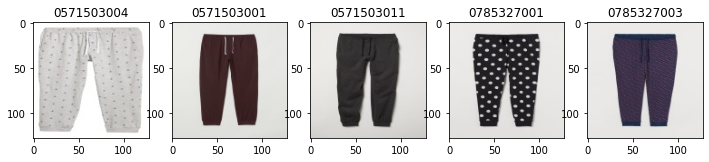





Unknown
Random article id: 104623    0925139002
Name: article_id, dtype: object, random_article name: 104623    Ruben set
Name: prod_name, dtype: object


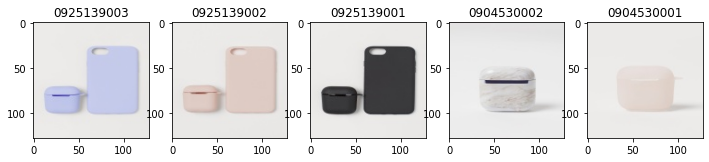





Underwear/nightwear
Random article id: 38469    0657719003
Name: article_id, dtype: object, random_article name: 38469    Sleepbag Padded
Name: prod_name, dtype: object


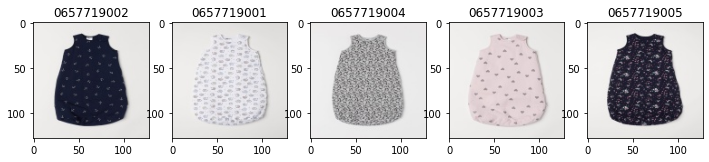





Shoes
Random article id: 82542    0808866006
Name: article_id, dtype: object, random_article name: 82542    Sarah Low BB
Name: prod_name, dtype: object


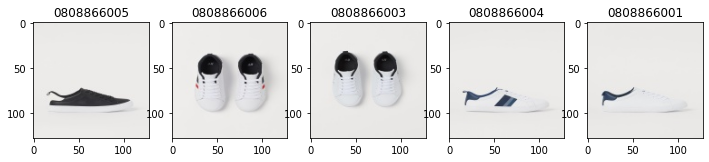





Swimwear
Random article id: 59461    0723529005
Name: article_id, dtype: object, random_article name: 59461    Lazer Razer Adj. push triangle
Name: prod_name, dtype: object


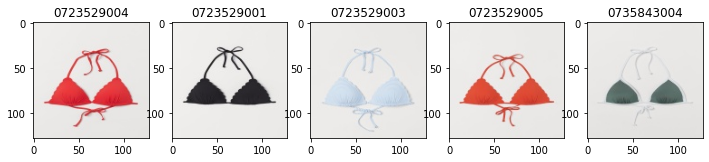





Garment Full body
Random article id: 44808    0681180009
Name: article_id, dtype: object, random_article name: 44808    Panda skate dress j
Name: prod_name, dtype: object


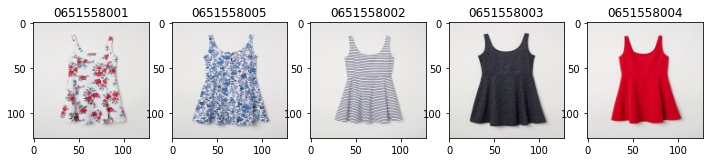





Cosmetic
Random article id: 79978    0800333004
Name: article_id, dtype: object, random_article name: 79978    Lip balm unicorn
Name: prod_name, dtype: object


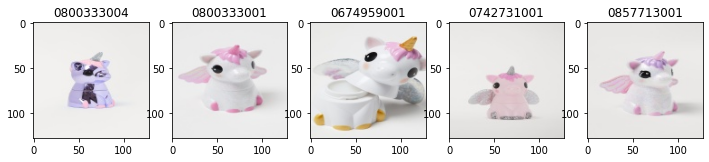





Interior textile
Random article id: 88239    0832168001
Name: article_id, dtype: object, random_article name: 88239    TOWEL cape(1)
Name: prod_name, dtype: object


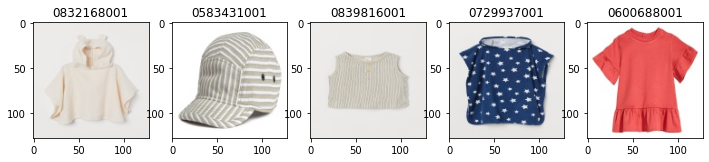





Bags
Random article id: 90958    0845714001
Name: article_id, dtype: object, random_article name: 90958    Bag Jimmy Sporty Weekend
Name: prod_name, dtype: object


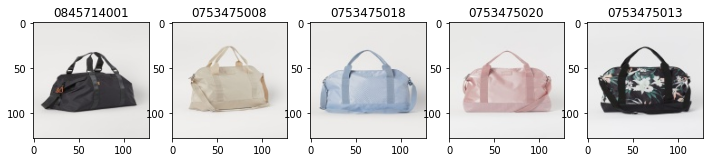





Furniture
Random article id: 62949    0738103001
Name: article_id, dtype: object, random_article name: 62949    TC DETERGENT BLACK (1)
Name: prod_name, dtype: object


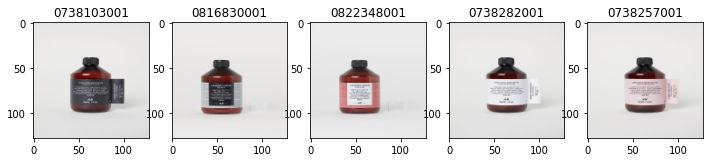





Garment and Shoe care
Random article id: 84779    0816846001
Name: article_id, dtype: object, random_article name: 84779    TC - sewing kit
Name: prod_name, dtype: object


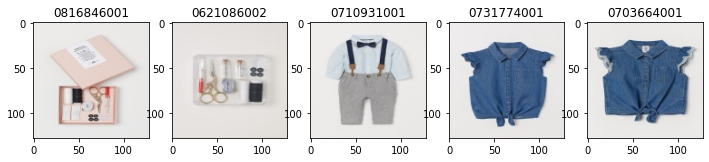





Fun
Random article id: 104590    0924851002
Name: article_id, dtype: object, random_article name: 104590    HLW Bucket
Name: prod_name, dtype: object


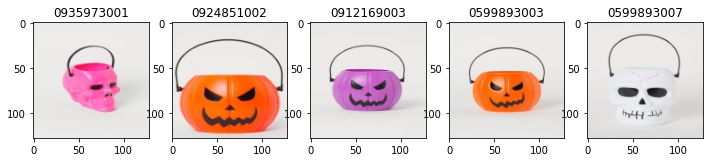





Stationery
Random article id: 97589    0874961004
Name: article_id, dtype: object, random_article name: 97589    TC - TEXTILE MARKER FC
Name: prod_name, dtype: object


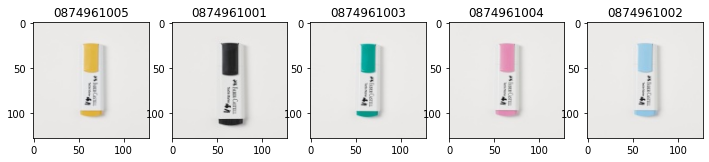

In [63]:
for product_group in articles.product_group_name.unique():
    print(product_group)
    random_article = articles[articles['product_group_name']==product_group].sample(1)
    print(f'Random article id: {random_article.article_id}, random_article name: {random_article.prod_name}')
    find_similar_images(random_article.article_id, text_embeddings, tree)
    print('\n\n\n')

### tensorboard

In [110]:
articles_set = set([file.stem for file in Path('../data/01_raw/images_128_128').glob('*.jpg')])

In [111]:
embeddings_sample = text_embeddings.filter(items=articles_set, axis=0).sample(n=4_000)

In [112]:
all_images = embeddings_sample.index.to_list()

In [113]:
all_images[:5]

['0584115001', '0875827001', '0606696003', '0584765002', '0757175004']

In [114]:
embeddings_sample.to_csv('tensorboard_embeddings/feature_vecs.tsv', sep="\t", index=False, header=False)

In [115]:
images_list = [Image.open(f'../data/01_raw/images_128_128/{article_id}.jpg').convert('RGB') for article_id in all_images]

In [116]:
image_width, image_height = images_list[0].size

In [117]:
one_square_size = int(np.ceil(np.sqrt(len(images_list))))

In [118]:
master_width = image_width * one_square_size
master_height = image_height * one_square_size

In [119]:
master_width, master_height

(8192, 8192)

In [120]:
spriteimage = Image.new(
    mode='RGBA',
    size=(master_width, master_height),
    color=(0,0,0,0))  # fully transparent

In [121]:
for count, image in enumerate(images_list):
    div, mod = divmod(count, one_square_size)
    h_loc = image_width*div
    w_loc = image_width*mod
    spriteimage.paste(image, (w_loc, h_loc))

In [122]:
spriteimage.convert("RGB").save('tensorboard_embeddings/sprite.jpg', transparency=0)

In [123]:
sample_articles = articles[articles.article_id.isin(all_images)].copy()

In [124]:
sample_articles['article_id'] = pd.Categorical(sample_articles.article_id, categories=all_images, ordered=True)

In [125]:
sample_articles.sort_values(by='article_id', inplace=True)

In [126]:
sample_articles[['article_id', 'product_group_name', 'colour_group_name']].to_csv('tensorboard_embeddings/metadata.tsv', sep='\t', index=False)